In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import glob
import os
import string
import plotly.express as px
from pathlib import Path
from datetime import datetime
import datetime as dt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
import nltk
import gensim
from gensim.models import CoherenceModel
from gensim.models import LdaModel
import pyLDAvis
import pyLDAvis.gensim_models  # don't skip this
import matplotlib.pyplot as plt
import gensim.corpora as corpora
import calendar
from nltk.util import ngrams
from nltk.util import bigrams
from nltk.util import trigrams
from sklearn.feature_extraction.text import CountVectorizer
from gensim.models.phrases import Phrases, Phraser
from collections import Counter
import pyLDAvis.gensim_models as gensimvis
from gensim.utils import tokenize

In [2]:
path = 'C:/Users/WINDOWS 10/Documents/Skripsi/scrapingFIX' #/FIXCSV
li = []

for file in Path(path + '/FIXCSV').glob('*.csv'):
    li.append(pd.read_csv(file))

df = pd.concat(li, axis=0, ignore_index=True)

In [3]:
df_copy = df.copy()

In [4]:
df_copy.head()

,title,question,user_name,user_type,date,link
0,Bengkak dan merah pasca imunisasi DPT,"Dok,anak saya sudah imunisasi DPT, terus bekas...",An**i,Anggota,14 Januari 2018,https://www.alodokter.com/komunitas/topic/beng...
1,penyebab mendengar suara yang terdengar lebih ...,"Dok, suara yang saya dengar tiba"" menjadi sang...",ha*****8,Anggota,16 Januari 2018,https://www.alodokter.com/komunitas/topic/suar...
2,Perbedaan gejala hamil dengan sakit maag,mlm donk saya rina udah menikah usia 24 tahun ...,Va******o,Anggota,16 Januari 2018,https://www.alodokter.com/komunitas/topic/apak...
3,Mengatasi kepala pusing dan susah tidur,Dok saya mau bertanya kenapa ya saya akhir2 in...,Li***h,Anggota,16 Januari 2018,https://www.alodokter.com/komunitas/topic/kepa...
4,penggunaan biotin untuk menumbuhkan rambut,"selamat malam dokter, saya mau tau info dong, ...",He*i,Anggota,16 Januari 2018,https://www.alodokter.com/komunitas/topic/biot...


In [5]:
df_copy['tahun'] = df_copy['date'].str.split().str[-1]

----

In [6]:
df_train19 = df_copy[df_copy['tahun'] == '2019'].reset_index()

In [7]:
#create dummy 
train_dummy = df_train19[:10]

In [8]:
train_dummy

,index,title,question,user_name,user_type,date,link,tahun
0,107517,Muntah pada ibu hamil 4 bulan setelah konsumsi...,"Pagi dok, saya sdg hamil 4 bulan kurang. Semal...",R,Anggota,29 Desember 2019,https://www.alodokter.com/komunitas/topic/hami...,2019
1,107518,Benjolan di leher yang semakin membesar disert...,"Terimakasih dok sebelumnya, Dalam tiga bulan t...",Po***a,Anggota,29 Desember 2019,https://www.alodokter.com/komunitas/topic/apa-...,2019
2,107519,Benjolan gatal di vagina disertai keputihan ke...,Hallo dok..Saya umur 18 tahun. Di bibir vagina...,Na***a,Anggota,29 Desember 2019,https://www.alodokter.com/komunitas/topic/apak...,2019
3,107520,Apakah jika dibius total untuk mencabut 3 gigi...,"Selamat pagi dokter, 5 tahun lalu sy pernah ak...",Di*n,Anggota,29 Desember 2019,https://www.alodokter.com/komunitas/topic/cabu...,2019
4,107521,Apakah jahe dan ayam bisa menyebabkan asma kam...,1. Kandungan apa yg terdapat pada jahe dan aya...,Kh******h,Anggota,29 Desember 2019,https://www.alodokter.com/komunitas/topic/jahe...,2019
5,107522,Bercak putih di tenggorokan disertai tenggorok...,"Saya radang tenggorokan, ada bercak putih di t...",Mu*****d,Anggota,29 Desember 2019,https://www.alodokter.com/komunitas/topic/apak...,2019
6,107523,Apakah jahe dan ayam bisa menyebabkan asma kam...,1. Kandungan apa yg terdapat pada jahe dan aya...,Kh******h,Anggota,29 Desember 2019,https://www.alodokter.com/komunitas/topic/jahe...,2019
7,107524,Bercak putih di tenggorokan disertai tenggorok...,"Saya radang tenggorokan, ada bercak putih di t...",Mu*****d,Anggota,29 Desember 2019,https://www.alodokter.com/komunitas/topic/apak...,2019
8,107525,Bruntusan berair yang terasa gatal di vagina,"halo dok, waktu diawal muncul rasa gatal di de...",pi****n,Anggota,29 Desember 2019,https://www.alodokter.com/komunitas/topic/miss...,2019
9,107526,Ruam gatal di seluruh tubuh yang semakin menyebar,"selamat pagi dok,saya riski umur 24 th saya su...",Ki**y,Anggota,29 Desember 2019,https://www.alodokter.com/komunitas/topic/gata...,2019


---

In [9]:
# add stopword

stopword = stopwords.words('indonesian')
more_stopword = ['dok','dokter','selamat','halo','hallo','hi','alodokter',
                 'tadi','terus','nya','lalu','apa','jadi','bahkan','iya',
                 'kira','terimakasih','Dokter','Dok', 'langsung ',
                 'minggu', 'malam', 'siang', 'kali', 'sebab','alami', 
                 'pagi','kadang','mohon', 'terima','kasih']
stopword.extend(more_stopword)
fin_stp = set([word for word in stopword])

In [10]:
#create replace
dok = 'dok'

In [11]:
#slang word
baku = pd.read_csv(path + '/baku/baku[ori].csv')

std_word_replace = {}
for i, row in enumerate(baku['slang']):
    std_word_replace[row] = baku['baku'].iloc[i]

In [12]:
def clean_text(text):
    new_text = []
    text = text.lower()

    #remove punctuation
    text = ''.join('' if a in string.punctuation else a for a in text)
    #a_dum
    text = text.split()
    for i,word in enumerate(text):
        if 'dok' in word and i < len(text) - 1 and not text[i+1].startswith('dok'):
            text[i] = 'dok'
    text = " ".join(text)
    #b_dum
    new_text.append(text)

    return new_text


In [13]:
s = "Hello, world! How are you?"
new_s = ""
for i, c in enumerate(s):
    if c == "o":
        new_s += str(i)
    else:
        new_s += c
print(new_s)

Hell4, w8rld! H15w are y23u?


In [14]:
def clean_text1(text):
    new_text = []
    text = text.lower()

    #remove punctuation
    text = ''.join('' if a in string.punctuation else a for a in text)
    #a_dum
    text = text.split()
    for i,word in enumerate(text):
        if 'dok' in word and word.startswith('dok') and len(word) > 3:
            text[i] = 'dok ' + word[3:]
    text = " ".join(text)

    new_text.append(text)
    return new_text
    

In [15]:
def clean_text2(text):
    new_text = []
    text = text.lower()

    #remove punctuation
    text = ''.join('' if a in string.punctuation else a for a in text)
    #a_dum
    text = text.split()
    for i,word in enumerate(text):
        if 'dok' in word and word.startswith('dok') and len(word) > 3:
            text[i] = 'dok ' + word[3:]
    text = " ".join(text)
    #c_dum
    
    #normalization into standar word 
    for text in text.split():
        if text not in std_word_replace:
            new_text.append(text)
        elif text in std_word_replace:
            new_text += std_word_replace[text].split()
    #stopword
    new_text = ' '.join(text for text in new_text if text not in fin_stp)
    #d_dum
    return new_text    

In [16]:
a_dum = train_dummy['question'].apply(lambda x: clean_text(x))

In [17]:
b_dum = train_dummy['question'].apply(lambda x: clean_text(x))

In [18]:
c_dum = train_dummy['question'].apply(lambda x: clean_text1(x))

In [19]:
d_dum = train_dummy['question'].apply(lambda x: clean_text2(x))

In [20]:
a_dum

0    [pagi dok saya sdg hamil 4 bulan kurang semala...
1    [terimakasih dok sebelumnya dalam tiga bulan t...
2    [hallo dok umur 18 tahun di bibir vagina saya ...
3    [selamat pagi dok 5 tahun lalu sy pernah akan ...
4    [1 kandungan apa yg terdapat pada jahe dan aya...
5    [saya radang tenggorokan ada bercak putih di t...
6    [1 kandungan apa yg terdapat pada jahe dan aya...
7    [saya radang tenggorokan ada bercak putih di t...
8    [halo dok waktu diawal muncul rasa gatal di de...
9    [selamat pagi dok riski umur 24 th saya sudah ...
Name: question, dtype: object

In [21]:
b_dum

0    [pagi dok saya sdg hamil 4 bulan kurang semala...
1    [terimakasih dok sebelumnya dalam tiga bulan t...
2    [hallo dok umur 18 tahun di bibir vagina saya ...
3    [selamat pagi dok 5 tahun lalu sy pernah akan ...
4    [1 kandungan apa yg terdapat pada jahe dan aya...
5    [saya radang tenggorokan ada bercak putih di t...
6    [1 kandungan apa yg terdapat pada jahe dan aya...
7    [saya radang tenggorokan ada bercak putih di t...
8    [halo dok waktu diawal muncul rasa gatal di de...
9    [selamat pagi dok riski umur 24 th saya sudah ...
Name: question, dtype: object

In [22]:
c_dum

0    [pagi dok saya sdg hamil 4 bulan kurang semala...
1    [terimakasih dok sebelumnya dalam tiga bulan t...
2    [hallo dok saya umur 18 tahun di bibir vagina ...
3    [selamat pagi dok ter 5 tahun lalu sy pernah a...
4    [1 kandungan apa yg terdapat pada jahe dan aya...
5    [saya radang tenggorokan ada bercak putih di t...
6    [1 kandungan apa yg terdapat pada jahe dan aya...
7    [saya radang tenggorokan ada bercak putih di t...
8    [halo dok waktu diawal muncul rasa gatal di de...
9    [selamat pagi dok saya riski umur 24 th saya s...
Name: question, dtype: object

In [23]:
d_dum

0    hamil 4 semalam tidur makan minum buavita jeru...
1    merasakan aneh pernafasan terdengar suara aneh...
2    umur 18 bibir vagina benjolan gatal keputihan ...
3    ter 5 pergi gigi graham kiri proses berjalan d...
4    1 kandungan jahe ayam asma kumat rempah rempah...
5    radang tenggorokan bercak putih tenggorokan me...
6    1 kandungan jahe ayam asma kumat rempah rempah...
7    radang tenggorokan bercak putih tenggorokan me...
8    diawal muncul gatal miss v menggaruknya muncul...
9    riski umur 24 bberpa merasakan gatal menyebar ...
Name: question, dtype: object

In [24]:
def clean_text3(text):
    new_text = []
    text = text.lower()

    #remove punctuation
    text = ''.join('' if a in string.punctuation else a for a in text)
    #a_dum
    text = text.split()
    for i,word in enumerate(text):
        if 'dok' in word and word.startswith('dok') and len(word) > 3:
            text[i] = 'dok ' + word[3:]
    text = " ".join(text)
    #c_dum
    
    #normalization into standar word 
    for text in text.split():
        if text not in std_word_replace:
            new_text.append(text)
        elif text in std_word_replace:
            new_text += std_word_replace[text].split()
    #stopword
    new_text = ' '.join(text for text in new_text if text not in fin_stp)
    #d_dum  

    #create token 
    new_text = tokenize(new_text)
    new_text = list(new_text)

    return new_text

In [25]:
from mpstemmer import MPStemmer

In [26]:
#stemmer 
stemming = MPStemmer()

In [27]:
def clean_text4(text):
    new_text = []
    text = text.lower()

    #remove punctuation
    text = text.replace(',', ' ')
    text = re.sub(r'[{}]'.format(string.punctuation), ' ', text)
    text = ''.join('' if a in string.punctuation else a for a in text)
    
    #a_dum
    text = text.split()
    for i,word in enumerate(text):
        if 'dok' in word and word.startswith('dok') and len(word) > 3:
            text[i] = 'dok ' + word[3:]
    text = " ".join(text)
    #c_dum
    
    #normalization into standar word 
    for text in text.split():
        if text not in std_word_replace:
            new_text.append(text)
        elif text in std_word_replace:
            new_text += std_word_replace[text].split()
    #stopword
    new_text = ' '.join(stemming.stem(text) for text in new_text if text not in fin_stp)
    #d_dum  

    # #create token 
    new_text = tokenize(new_text)
    new_text = list(new_text)

    return new_text

In [28]:
e_dum = train_dummy['question'].apply(lambda x: clean_text3(x))

In [29]:
e_dum

0    [hamil, semalam, tidur, makan, minum, buavita,...
1    [merasakan, aneh, pernafasan, terdengar, suara...
2    [umur, bibir, vagina, benjolan, gatal, keputih...
3    [ter, pergi, gigi, graham, kiri, proses, berja...
4    [kandungan, jahe, ayam, asma, kumat, rempah, r...
5    [radang, tenggorokan, bercak, putih, tenggorok...
6    [kandungan, jahe, ayam, asma, kumat, rempah, r...
7    [radang, tenggorokan, bercak, putih, tenggorok...
8    [diawal, muncul, gatal, miss, v, menggaruknya,...
9    [riski, umur, bberpa, merasakan, gatal, menyeb...
Name: question, dtype: object

In [30]:
def create_ngrams(texts, min_count=1, threshold=1):
    # Tokenize the texts
    tokenized_texts = texts
    
    # Create bigram
    bigram = gensim.models.Phrases(tokenized_texts, min_count=min_count, threshold=3)
    bigram_phraser = gensim.models.phrases.Phraser(bigram)
    
    # Create trigram
    trigram = gensim.models.Phrases(bigram[tokenized_texts], min_count=min_count, threshold=threshold)
    trigram_phraser = gensim.models.phrases.Phraser(trigram)
    
    # Return the tokenized texts with bigram and trigram
    return [[word for word in trigram_phraser[bigram_phraser[text]]] for text in tokenized_texts]

In [31]:
bigram1 = gensim.models.Phrases(e_dum, min_count=3, threshold=7)
bigram1mod = gensim.models.phrases.Phraser(bigram1)

trigram1 = gensim.models.Phrases(bigram1[e_dum], min_count=2, threshold=4.6)
trigram1mod = gensim.models.phrases.Phraser(trigram1)

In [32]:
def make_bigrams(texts):
    return [bigram1mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram1mod[bigram1mod[doc]] for doc in texts]

In [33]:
bigramdum = make_bigrams(e_dum)
trigramdum = make_trigrams(e_dum)

-----

# 2019

In [34]:
df_train19.head()

,index,title,question,user_name,user_type,date,link,tahun
0,107517,Muntah pada ibu hamil 4 bulan setelah konsumsi...,"Pagi dok, saya sdg hamil 4 bulan kurang. Semal...",R,Anggota,29 Desember 2019,https://www.alodokter.com/komunitas/topic/hami...,2019
1,107518,Benjolan di leher yang semakin membesar disert...,"Terimakasih dok sebelumnya, Dalam tiga bulan t...",Po***a,Anggota,29 Desember 2019,https://www.alodokter.com/komunitas/topic/apa-...,2019
2,107519,Benjolan gatal di vagina disertai keputihan ke...,Hallo dok..Saya umur 18 tahun. Di bibir vagina...,Na***a,Anggota,29 Desember 2019,https://www.alodokter.com/komunitas/topic/apak...,2019
3,107520,Apakah jika dibius total untuk mencabut 3 gigi...,"Selamat pagi dokter, 5 tahun lalu sy pernah ak...",Di*n,Anggota,29 Desember 2019,https://www.alodokter.com/komunitas/topic/cabu...,2019
4,107521,Apakah jahe dan ayam bisa menyebabkan asma kam...,1. Kandungan apa yg terdapat pada jahe dan aya...,Kh******h,Anggota,29 Desember 2019,https://www.alodokter.com/komunitas/topic/jahe...,2019


In [35]:
df_train19 = df_train19.drop('index', axis=1)

## clean the dataframe

In [36]:
df_train19['clean'] = df_train19['question'].apply(lambda x: clean_text4(x))

In [37]:
df_train19['clean'][5123]

['tahun', 'operasi', 'tumor', 'jinak', 'tumbuh', 'gatal']

In [38]:
#ngram 
big19 = gensim.models.Phrases(df_train19['clean'], min_count=2, threshold=5.5)
bigmod = gensim.models.phrases.Phraser(big19)

trig19 = gensim.models.Phrases(big19[df_train19['clean']], min_count=2, threshold=2)
trigmod = gensim.models.phrases.Phraser(trig19)

In [39]:
def make_big(texts):
    return [bigmod[doc] for doc in texts]

def make_trig(texts):
    return [trigmod[bigmod[doc]] for doc in texts]

In [40]:
bigrams19 = make_big(df_train19['clean'])
trigrams19 = make_trig(df_train19['clean'])

In [41]:
token_toremove = ['terima_kasih','kasih','sebab',
                  'terima','tanggal','hari','teman',
                  'bulan','kah', 'maaf','trimakasih',
                  'assalamualaikum', 'jelas_terima', 
                  'atas_terima', 'hello', 'ku', 'doc', 
                  'trimakasi', 'trkadang', 'skrg', 
                  'jelas','cek', 'kemarin', 'apakh', 
                  'sok', 'tanya', 'ig', 'cerita', 'biar', 
                  'pakai', 'laku', 'saran', 'ada', 'nomor', 
                  'sih', 'suka', 'selsai', 'minggu', 'tunggu', 
                  'keluar', 'solusi', 'alami', 'apa', 'tolong', 'kena',
                  'salah', 'orang', 'beda', 'coba', 'batch', 
                  'amadeo_basfiansa', 'ianya', 
                  'dlakukan', 'maksud', 'kesan', 'deh', 'and', 
                  'tanyak', 'nak', 'nyri', 'ubat', 'rana', 'aqua',
                  'assalamu_alaikum', 'hai_brtanya', 'gara', 'uk', 'terima_kasih_kasih', 
                  'smacam', 'nama', 'now_watching', 'tolong_solusi_terima_kasih','tgl',
                  'atas_terima_kasih','ass','tolong_jelas','tolong_jelas','nanyak',
                  'wass', 'jawabanya_terima_kasih', 'doctor', 'doktor', 'hai', 'terimakasi', 
                  'misi', 'kemarin_habis', 'tnykn', 'dokk', 'hai_doktor', 'berak_dokk', 'jam', 
                  'sore', 'umur' ,'sakit', 'sembuh', 'usia', 'kayak', 'knapa', 'terima_kasih_sukses', 
                  'sekian_terima_kasih', 'umur_alami', 'assalamu_alaikum_nama', 'ter',
                  'ter_bedah']
for i, doc in enumerate(trigrams19):
    trigrams19[i] = [token for token in doc if token != token_toremove]

In [42]:
filtered_token = [[token for token in doc if token not in token_toremove] for doc in trigrams19]

In [43]:
# check removed token
word_freq19 = Counter([item for sublist in filtered_token for item in sublist])
word_freq19.most_common(10)

[('obat', 22468),
 ('anak', 15979),
 ('darah', 8776),
 ('normal', 8247),
 ('hamil', 7817),
 ('nyeri', 7089),
 ('hilang', 6895),
 ('gatal', 6171),
 ('mata', 6061),
 ('minum', 5858)]

In [44]:
#create dict
dictionary19 = corpora.Dictionary(filtered_token)
#create corpus
texts = filtered_token
corpus19 = [dictionary19.doc2bow(text) for text in texts]

In [ ]:
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    coherence_values = []
    model_list1 = []

    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus,
                        id2word=dictionary,
                        num_topics=num_topics, 
                        random_state=42,
                        chunksize=100,
                        passes=20,
                        update_every=5,
                        alpha=0.7,
                        eta=0.4,
                        decay=0.2,
                        iterations=150,
                        minimum_probability=0.09,
                        per_word_topics=True) 
        model_list1.append(model)
        #check the coherence value
        coherencemodel = CoherenceModel(model=model, 
                                        texts=texts,
                                        dictionary=dictionary, 
                                        coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

        #check the preplexity
        perplexity = model.log_perplexity(corpus)

    return model_list1, coherence_values, perplexity

In [ ]:
model_list, coherence_values, preplexity = compute_coherence_values(dictionary=dictionary19, corpus=corpus19, texts=filtered_token, start=2, limit=21, step=3) 

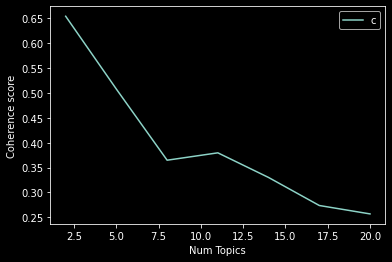

In [ ]:
# show graph
limit=21; start=2; step=3
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
best_model = model_list[np.argmax(coherence_values)]
best_model.print_topics()

[(0,
  '0.045*"parah" + 0.041*"putus_asa" + 0.026*"stres" + 0.022*"sulit" + 0.015*"bingung" + 0.014*"obat" + 0.010*"riwayat_penyakit" + 0.010*"hilang" + 0.010*"mual" + 0.009*"nyeri"'),
 (1,
  '0.089*"makan" + 0.054*"mual" + 0.037*"darah" + 0.031*"muntah" + 0.030*"bab_darah" + 0.030*"moga" + 0.030*"kena_asam_lambung" + 0.029*"makan_ikan" + 0.029*"faktor_pikir" + 0.029*"beliau_bilang"')]

In [ ]:
vis = gensimvis.prepare(best_model, corpus19, dictionary19)
pyLDAvis.display(vis)

c:\Users\WINDOWS 10\AppData\Local\Programs\Python\Python310\lib\site-packages\pyLDAvis\_prepare.py:244: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  by='saliency', ascending=False).head(R).drop('saliency', 1)
